In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\HP\Downloads\wholesale+customers\Wholesale customers data.csv")

## Data Preprocessing and EDA(10 visuals)

In [2]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
data.shape

(440, 8)

In [5]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Explore the distribution and relationships of key features (Fresh, Milk, Grocery, etc.).

In [8]:
# Define your 4-brand colors
custom_colors = ['#107082', '#F0CDA1', '#000000', '#FFFFFF']

import seaborn as sns

# Set seaborn palette
sns.set_palette(custom_colors)

# Optional: Apply a consistent seaborn theme
sns.set_theme(style="whitegrid", palette=custom_colors)


import matplotlib.pyplot as plt

# Sync matplotlib color cycle to use the same custom colors
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

# Optional: Customize background and grid styling to match your branding
plt.rcParams['figure.facecolor'] = '#FFFFFF'
plt.rcParams['axes.facecolor']   = '#FFFFFF'
plt.rcParams['savefig.facecolor'] = '#FFFFFF'

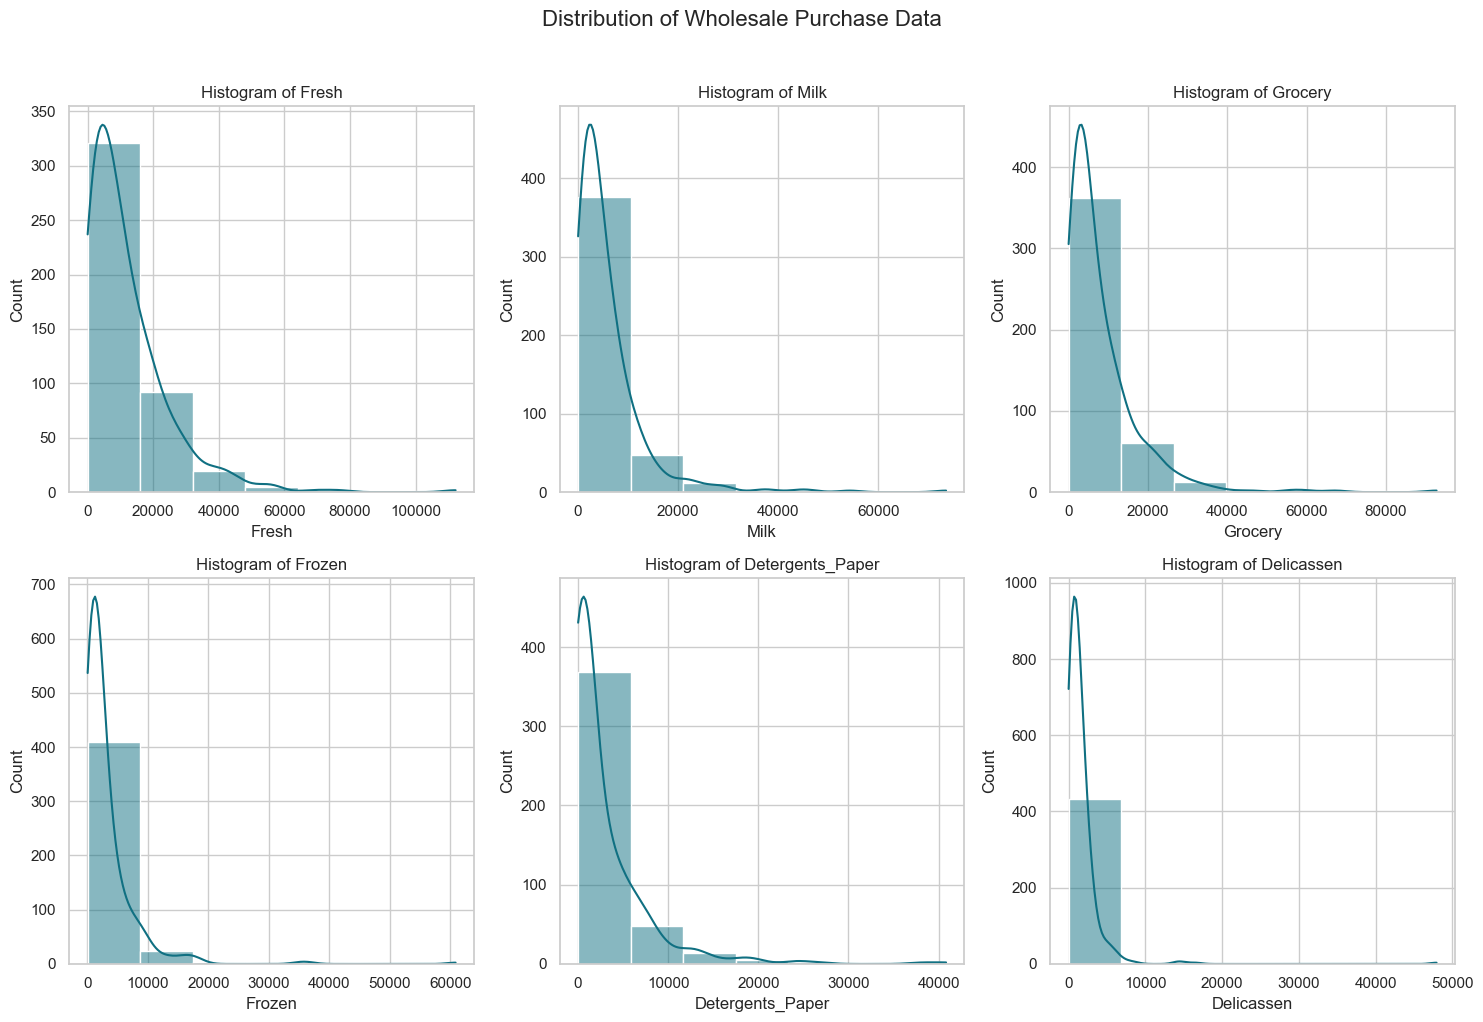

In [9]:
# Histograms for each column
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
axes = axes.flatten()

columns_to_plot = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for i, col in enumerate(columns_to_plot):
    sns.histplot(data[col], ax = axes[i], kde = True, bins = 7)
    axes[i].set_title(f'Histogram of {col}')

# Add a suptitle (main title)
plt.suptitle("Distribution of Wholesale Purchase Data", fontsize = 16, y = 1.02)  # y=1.02 adjusts vertical spacing

plt.tight_layout()  # Prevents title overlap
plt.savefig(r"C:\Users\HP\Downloads\Distribution of Wholesale Purchase Data.png", dpi = 300, bbox_inches='tight', facecolor='white')
plt.show()

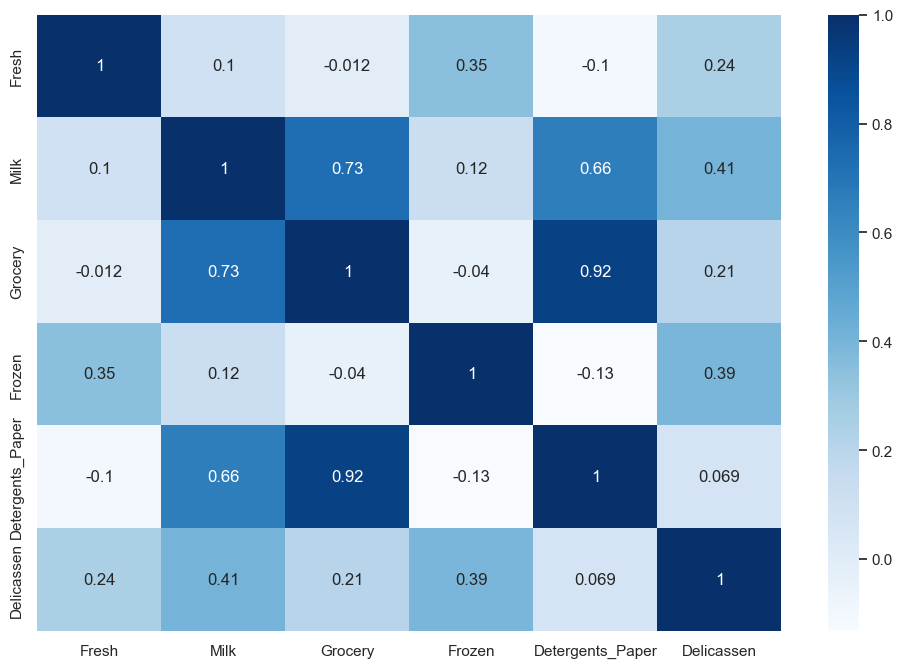

In [10]:
# Boxplot to check for outliers
plt.figure(figsize=(12,8))
columns_to_plot=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
sns.heatmap(data[columns_to_plot].corr(),annot=True,cmap='Blues')
plt.savefig(r"C:\Users\HP\Downloads\Variables heatmap.png", dpi = 300, bbox_inches='tight', facecolor='white')
plt.show()


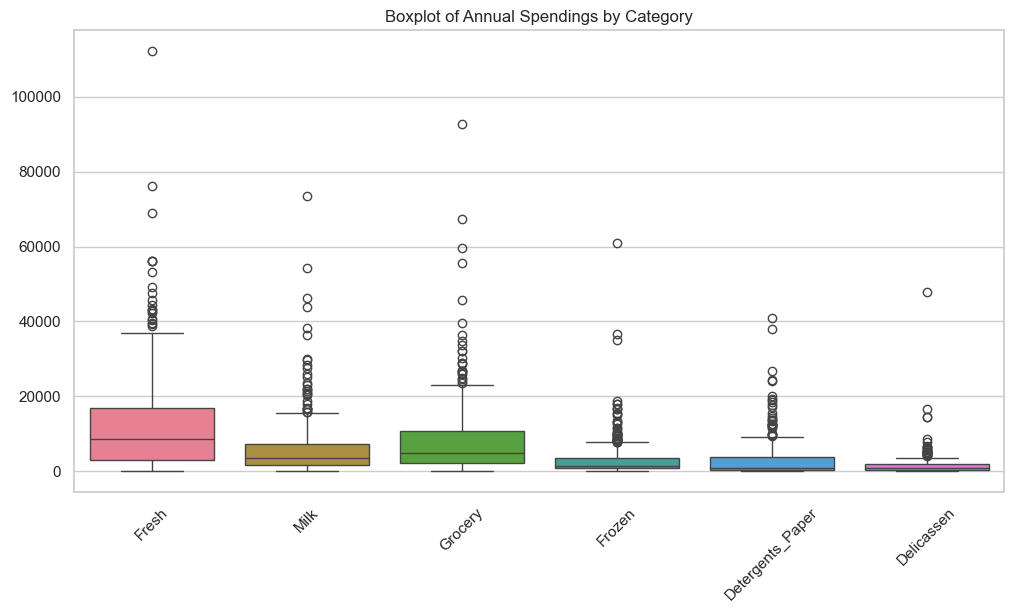

In [11]:
# Boxplot to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop(['Channel', 'Region'], axis=1))
plt.xticks(rotation=45)
plt.title("Boxplot of Annual Spendings by Category")
plt.savefig(r"C:\Users\HP\Downloads\Boxplot of Annual Spendings by Category.png", dpi = 300, bbox_inches='tight', facecolor='white')
plt.show()

## Outlier Detection

In [12]:
new_data=data
columns_to_detect=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
for col in columns_to_detect:
    Q1=new_data[col].quantile(0.25)
    Q3=new_data[col].quantile(0.75)
    IQR=Q3-Q1

    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    new_data=new_data[(new_data[col]>=lower_bound) & (new_data[col]<=upper_bound)]

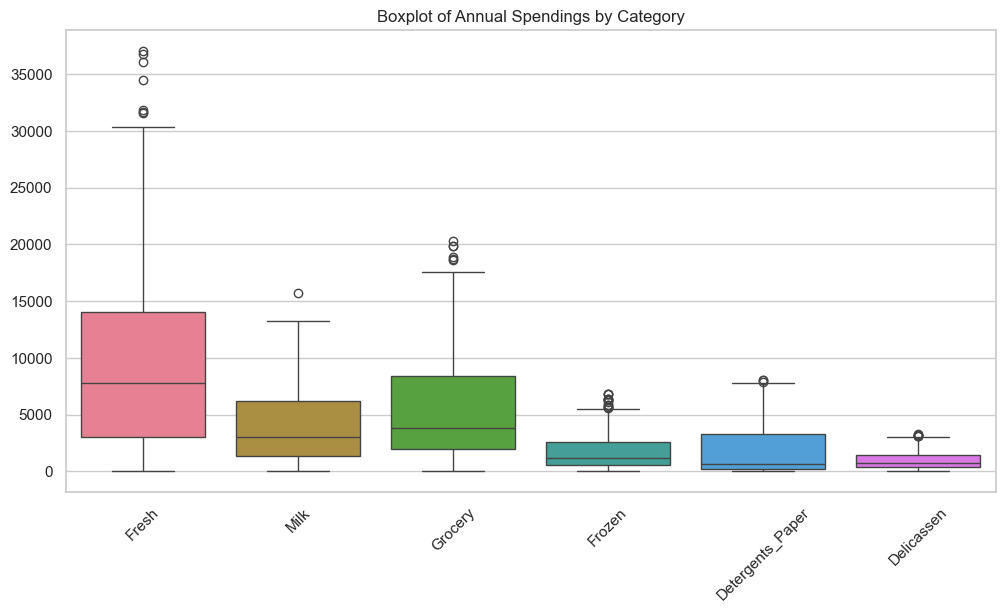

In [13]:
# Boxplot to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=new_data.drop(['Channel', 'Region'], axis=1))
plt.xticks(rotation=45)
plt.title("Boxplot of Annual Spendings by Category")
plt.savefig(r"C:\Users\HP\Downloads\Boxplot of Annual Spendings by Category.png", dpi = 300, bbox_inches='tight', facecolor='white')
plt.show()

In [14]:
new_data.shape

(318, 8)

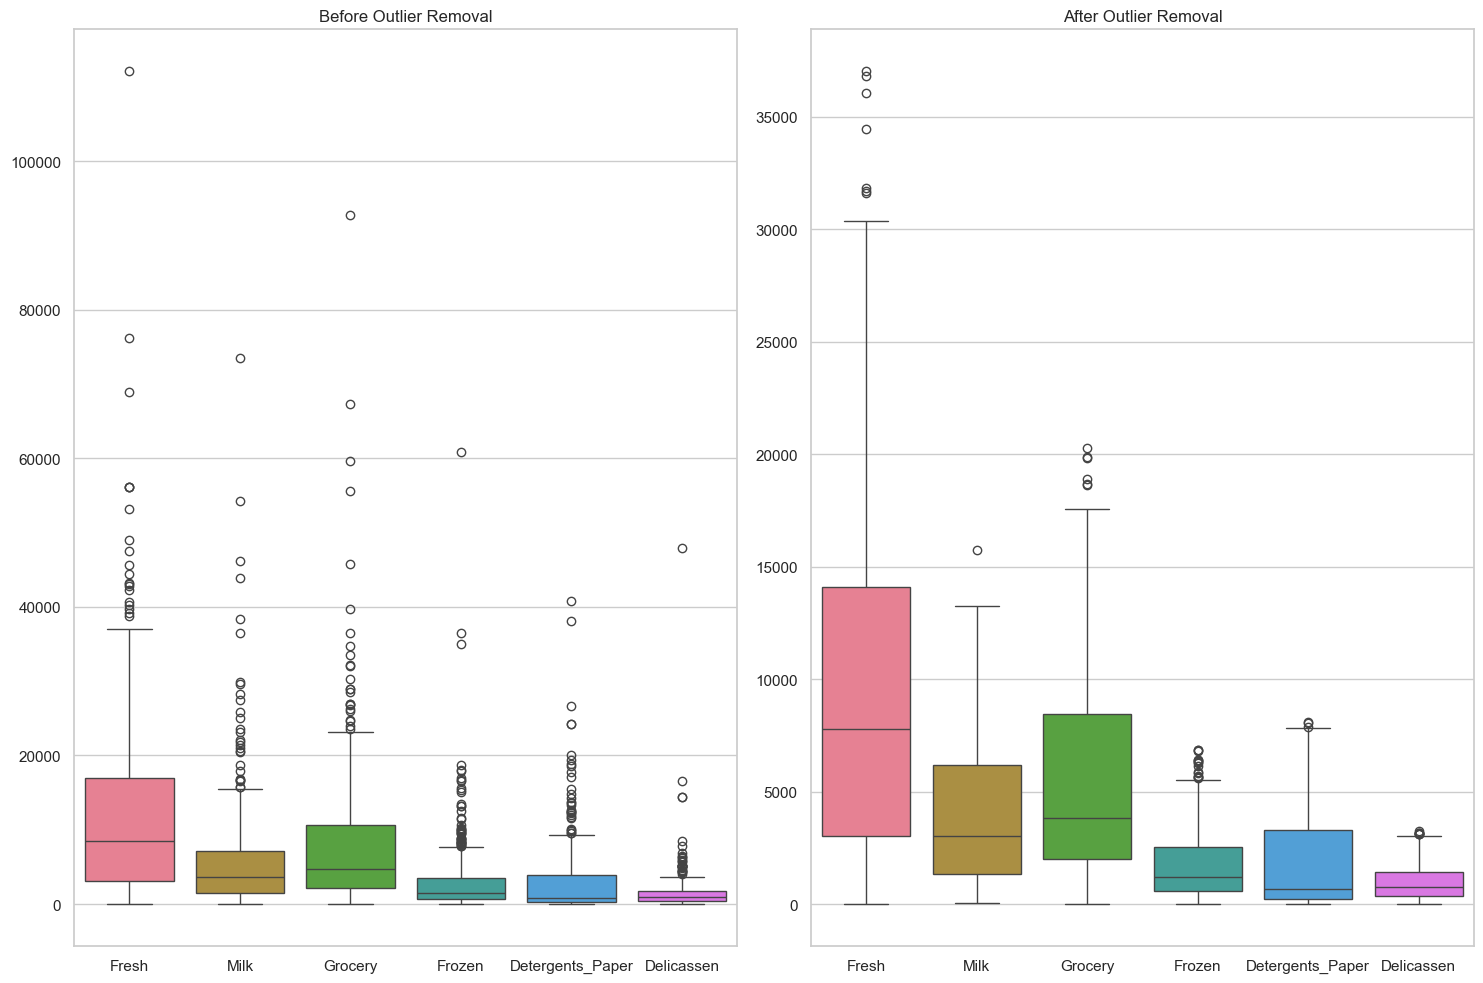

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
sns.boxplot(data=data[columns_to_plot], ax=axes[0])
axes[0].set_title('Before Outlier Removal')

sns.boxplot(data=new_data[columns_to_plot], ax=axes[1])
axes[1].set_title('After Outlier Removal')


plt.tight_layout()
plt.savefig(r"C:\Users\HP\Downloads\Boxplot of data with and without outliers.png", dpi = 300, bbox_inches='tight', facecolor='white')
plt.show()

## Analyze spending patterns by Channel and Region.

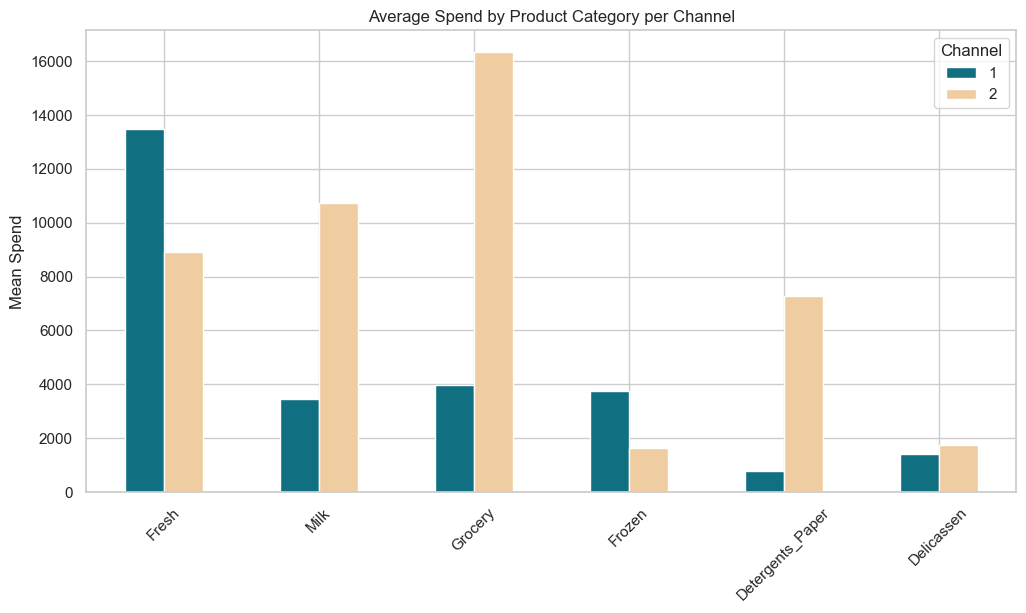

In [16]:
# Barplot of average spend by Channel
columns_to_plot2=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen','Channel']
channel_means = data[columns_to_plot2].groupby('Channel').mean()
channel_means.T.plot(kind='bar', figsize=(12, 6))
plt.title("Average Spend by Product Category per Channel")
plt.ylabel("Mean Spend")
plt.xticks(rotation=45)
plt.savefig(r"C:\Users\HP\Downloads\Average Spend by Product Category per Channel.png", dpi = 300, bbox_inches='tight', facecolor='white')
plt.show()

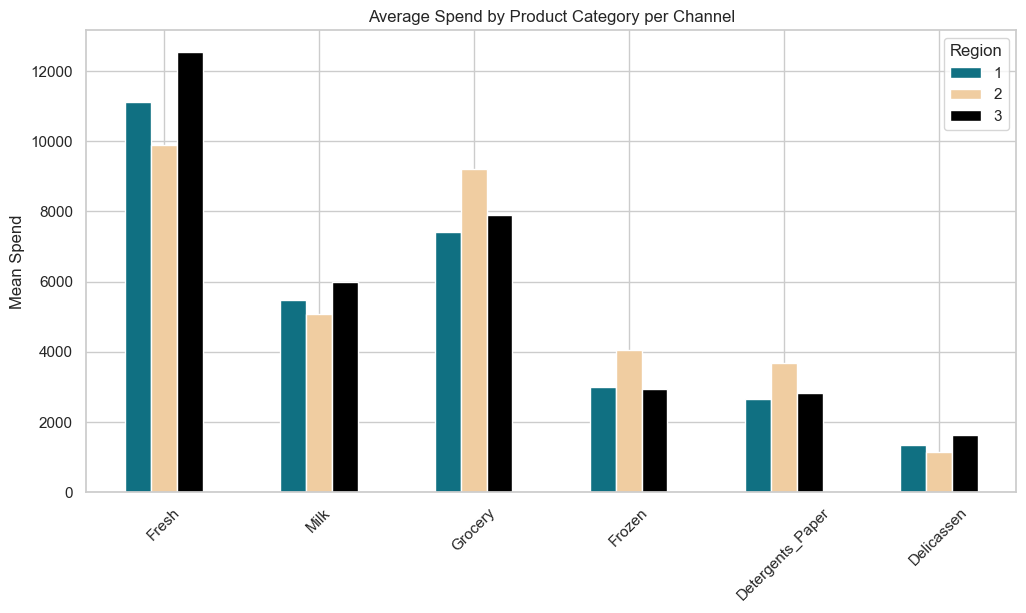

In [17]:
columns_to_plot3=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen','Region']
channel_means = data[columns_to_plot3].groupby('Region').mean()
channel_means.T.plot(kind='bar', figsize=(12, 6))
plt.title("Average Spend by Product Category per Channel")
plt.ylabel("Mean Spend")
plt.xticks(rotation=45)
plt.savefig(r"C:\Users\HP\Downloads\Average Spend by Product Category per Region.png", dpi = 300, bbox_inches='tight', facecolor='white')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

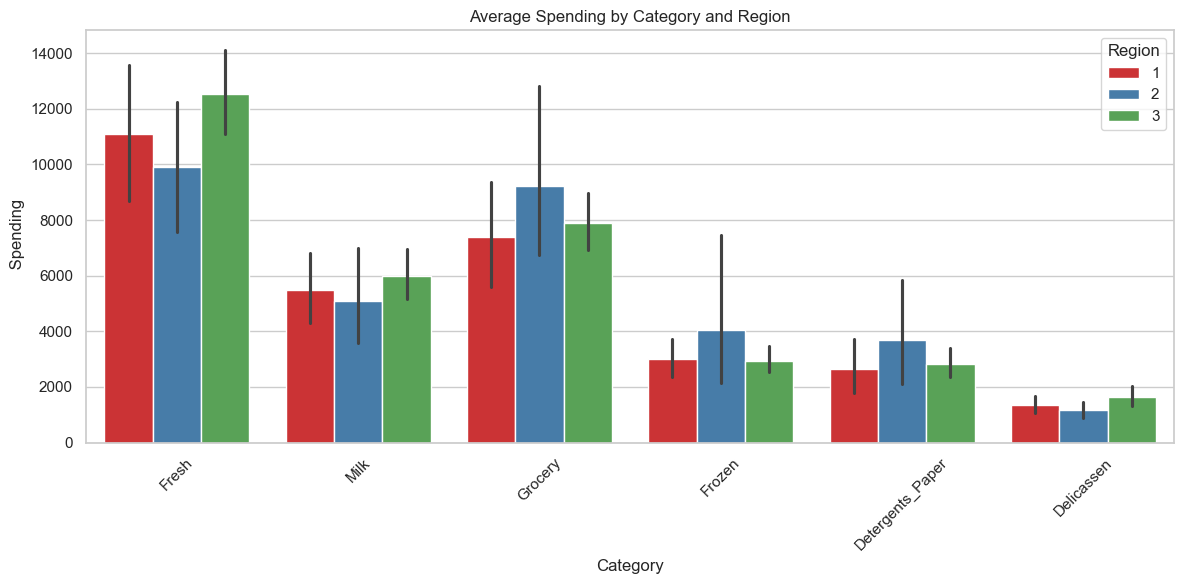

In [18]:
data_melted = data.melt(id_vars='Region', value_vars=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'],
                    var_name='Category', value_name='Spending')

plt.figure(figsize=(12, 6))
sns.barplot(data=data_melted, x='Category', y='Spending', hue='Region',palette='Set1')
plt.title('Average Spending by Category and Region')
plt.ylabel(' Spending')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Users\HP\Downloads\Average Spending by Category and Regio.png", dpi = 300, bbox_inches='tight', facecolor='white')
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

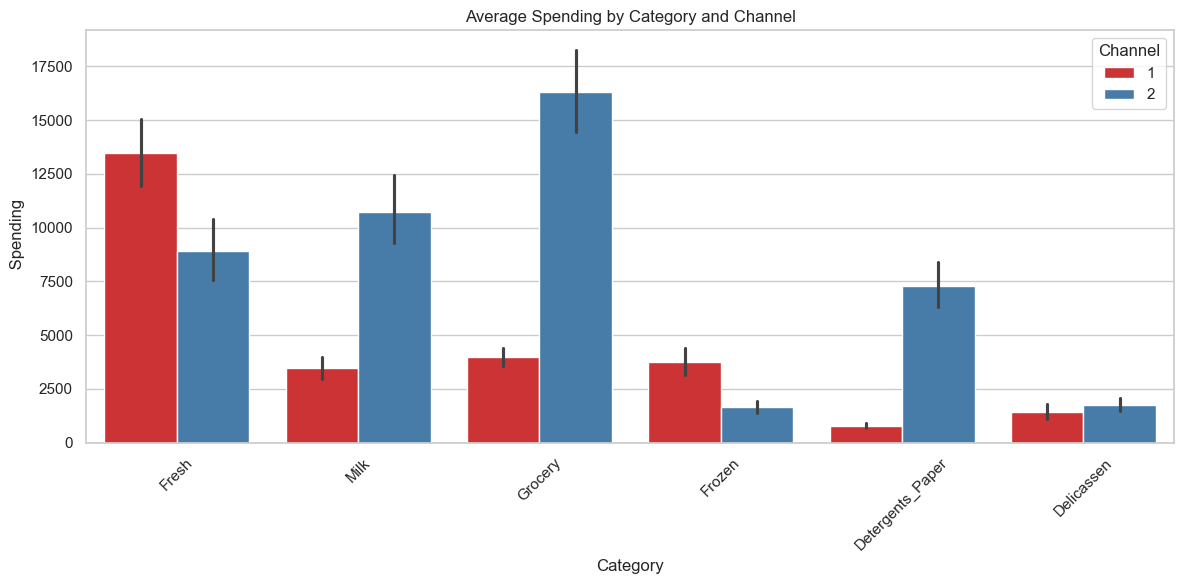

In [19]:
data_melted = data.melt(id_vars='Channel', value_vars=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'],
                    var_name='Category', value_name='Spending')

plt.figure(figsize=(12, 6))
sns.barplot(data=data_melted, x='Category', y='Spending', hue='Channel',palette='Set1')
plt.title('Average Spending by Category and Channel')
plt.ylabel(' Spending')
plt.legend(title='Channel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Users\HP\Downloads\Average Spending by Category and Channel.png", dpi = 300, bbox_inches='tight', facecolor='white')
plt.show 

## Scale the features using StandardScaler.

In [20]:
from sklearn.preprocessing import StandardScaler
X=new_data.drop(['Channel','Region'],axis=1)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

## Determine the Optimal Number of Clusters

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# creating variables inertia, silhouette_csore
inertia=[]
silhouette_scores=[]
K_Value=range(2,11)
for k in K_Value:
  kmeans=KMeans(n_clusters=k,random_state=42)  # initializing and fitting the data to Kmeans 
  kmeans.fit(X_scaled)
  Labels=kmeans.labels_
    
  inertia_s=kmeans.inertia_
  inertia.append(inertia_s)
    
  sil_scores=silhouette_score(X_scaled,Labels)
  silhouette_scores.append(sil_scores)
  print(f'k={k}: inertia={inertia_s}, Silhouette Score={sil_scores}')

k=2: inertia=1253.5739791099843, Silhouette Score=0.3525531857417495
k=3: inertia=1063.8199170516136, Silhouette Score=0.3294609159906463
k=4: inertia=886.5400881616617, Silhouette Score=0.26092069053207556
k=5: inertia=810.4910980081163, Silhouette Score=0.23069390285341615
k=6: inertia=762.7091587163264, Silhouette Score=0.2220853902234103
k=7: inertia=730.8346462840539, Silhouette Score=0.22104242396886264
k=8: inertia=646.8118799514091, Silhouette Score=0.22439208031670146
k=9: inertia=624.9012108430745, Silhouette Score=0.22218310815572845
k=10: inertia=599.2506534979015, Silhouette Score=0.18473556647357056


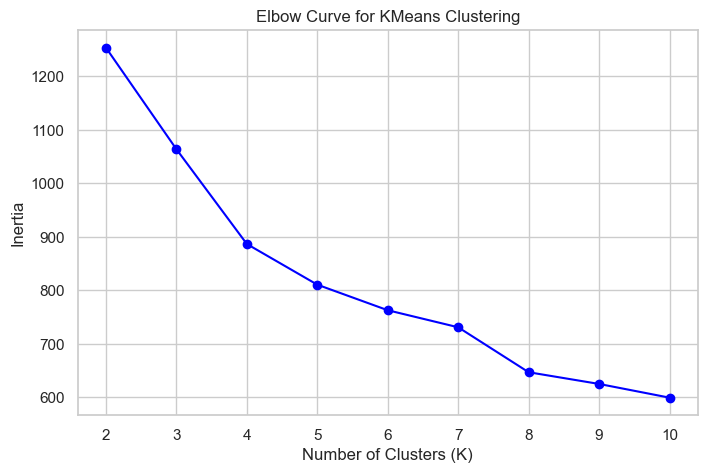

In [22]:
import matplotlib.pyplot as plt

K_Value = range(2, 11)
inertia = [1253.57, 1063.82, 886.54, 810.49, 762.71, 730.83, 646.81, 624.90, 599.25]

plt.figure(figsize=(8, 5))
plt.plot(K_Value, inertia, marker='o', linestyle='-', color='blue')
plt.title('Elbow Curve for KMeans Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_Value)
plt.grid(True)
plt.savefig(r"C:\Users\HP\Downloads\Average Spending by Category and Channel.png", dpi = 300, bbox_inches='tight', facecolor='white')
plt.show()

Look for the “elbow” or "bend" in the curve — that’s where inertia starts to level off.

Based on your data, the elbow is likely around K = 3 or 4, as the drop in inertia becomes less steep after that

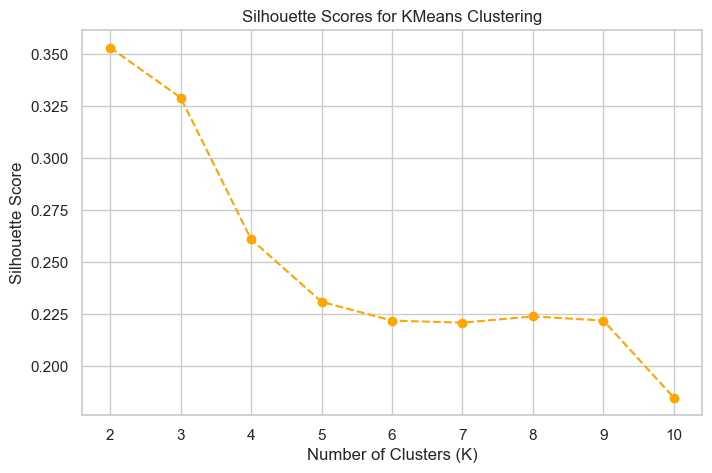

In [23]:
silhouette_scores = [0.353, 0.329, 0.261, 0.231, 0.222, 0.221, 0.224, 0.222, 0.185]

plt.figure(figsize=(8, 5))
plt.plot(K_Value, silhouette_scores, marker='o', linestyle='--', color='orange')
plt.title('Silhouette Scores for KMeans Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K_Value)
plt.grid(True)
plt.savefig(r"C:\Users\HP\Downloads\Silhouette Scores for KMeans Clustering.png", dpi = 300, bbox_inches='tight', facecolor='white')
plt.show()

The silhouette score tells you how well each data point fits within its assigned cluster, compared to other clusters.

+1: Point is well-clustered (far from other clusters).

0: Point is on the boundary between two clusters.

-1: Point may be in the wrong cluster.

K Silhouette Score Interpretation 2 0.353 Best overall separation – clusters are fairly distinct. 3 0.329 Still okay, but less separated. More overlap. 4 0.261 Quality of clustering drops — clusters start overlapping. 5–10 < 0.23 Weak clustering — clusters are poorly separated or too small.

K=2 is best for clean separation — maybe two types of customer behaviors (e.g. Horeca vs Retail, or high vs low spenders).

As K increases:

The algorithm tries to make more, smaller groups, but they overlap, reducing quality.

Silhouette scores drop — a sign of less meaningful clustering.

## Use both metrics to choose the optimal number of clusters.
Based on both inertia and silhouette score, the optimal number of clusters appears to be K = 2.

 Inertia:
Inertia decreases as the number of clusters increases, which is expected in KMeans.

However, the rate of decrease slows significantly after K = 3, forming an "elbow" in the curve.

This suggests that increasing clusters beyond 3 yields diminishing returns in terms of compactness.

 Silhouette Score:
The highest silhouette score is at K = 2 (score = 0.353), which indicates that the clusters are well-separated and internally coherent.

As K increases, the silhouette score drops, meaning that the clusters become less distinct and more overlapping.

For K ≥ 4, the silhouette score is consistently below 0.26, suggesting poor clustering quality.

 Conclusion:
Although inertia continues to drop beyond K=2, the best trade-off between cluster compactness (inertia) and cluster quality (silhouette) occurs at K = 2.
Therefore, K = 2 is the optimal number of clusters for this dataset.

## Apply KMeans with optimal K

#### Using K(2,4) to compare PCA to see comparison

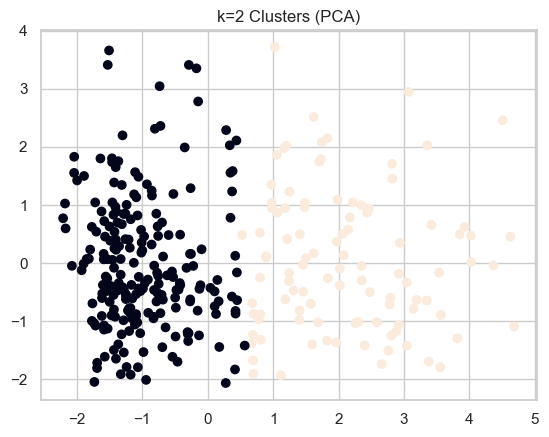

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# For k=2
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_scaled)
pca = PCA(n_components=2).fit_transform(X_scaled)
plt.scatter(pca[:, 0], pca[:, 1], c=kmeans.labels_)
plt.title("k=2 Clusters (PCA)")
plt.savefig(r"C:\Users\HP\Downloads\Clusters_2.png", dpi = 300, bbox_inches='tight', facecolor='white')
plt.show()

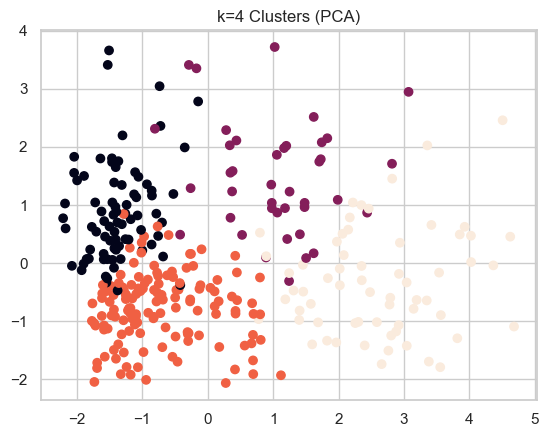

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# For k=2
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_scaled)
pca = PCA(n_components=4).fit_transform(X_scaled)
plt.scatter(pca[:, 0], pca[:, 1], c=kmeans.labels_)
plt.title("k=4 Clusters (PCA)")
plt.savefig(r"C:\Users\HP\Downloads\Clusters_4.png", dpi = 300, bbox_inches='tight', facecolor='white')
plt.show()

In [26]:
from sklearn.cluster import KMeans

In [27]:
#initialize the model
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [28]:
label=kmeans.labels_

In [29]:
new_data['cluster']=label
new_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
3,1,3,13265,1196,4221,6404,507,1788,0
5,2,3,9413,8259,5126,666,1795,1451,1
6,2,3,12126,3199,6975,480,3140,545,0


In [30]:
cluster_profile=new_data.groupby('cluster')[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean()
cluster_profile

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,10310.345622,2273.410138,2980.276498,2049.686636,631.285714,835.041475
1,8445.861386,7675.524752,11114.168317,1262.455446,4438.841584,1304.643564


## Summary of Cluster Interpretation
Cluster 0: "Fresh-Focused Buyers" (Likely Restaurants/Cafés)
High Fresh (10,310)

Low Milk, Grocery, Detergents_Paper

Moderate Frozen

Implies: Businesses prioritizing perishable goods (e.g., restaurants, hotels, cafés).

Cluster 1: "Diversified Retail Buyers" (Likely Supermarkets/Stores)
High Milk (7,676), Grocery (11,114), Detergents_Paper (4,439)

Lower Fresh (8,446)

Implies: Retailers selling a mix of staples, household items, and premium products (e.g., supermarkets, convenience stores).

## Business Application – Targeted Strategy

Cluster 0 – Fresh & Frozen-Oriented Buyers
 Profile Summary:
High spending on Fresh and Frozen products

Low spending on Milk, Grocery, Detergents_Paper, and Delicassen

 Business Strategy:
Bundle Offers:

Create Fresh + Frozen bundle discounts to encourage bulk purchases.

Cross-Selling Opportunity:

Introduce and promote packaged goods (e.g., detergents or grocery items) with small free samples to increase exposure.

Loyalty Program for Perishables:

Offer points or discounts for repeat purchases of fresh produce to build loyalty.

Delivery Efficiency:

Optimize cold chain logistics, since these customers depend heavily on perishable items.

Cluster 1 – High Packaged Goods & Delicassen Buyers
 Profile Summary:
Very high spending on Milk, Grocery, Detergents_Paper, and Delicassen

Lower spending on Fresh and Frozen

 Business Strategy:
Upselling Premium Products:

Promote higher-margin delicatessen items and imported grocery products.

Volume-Based Discounts:

Offer bulk discounts for cleaning and packaged goods to increase average order size.

Churn Reduction Tactics:

Identify high-value clients in this cluster and offer exclusive loyalty perks or priority support.

Targeted Promotions:

Send personalized offers for household items and gourmet products, which are their key interest areas.

## Add a new column "Suggested Strategy" to the DataFrame based on the cluster.

In [31]:
strategies = {
    0: "Target with fresh produce discounts",
    1: "Upsell grocery & household items"
}
new_data['Suggested_Strategy'] = new_data['cluster'].map(strategies)
new_data.head(50)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster,Suggested_Strategy
0,2,3,12669,9656,7561,214,2674,1338,1,Upsell grocery & household items
1,2,3,7057,9810,9568,1762,3293,1776,1,Upsell grocery & household items
3,1,3,13265,1196,4221,6404,507,1788,0,Target with fresh produce discounts
5,2,3,9413,8259,5126,666,1795,1451,1,Upsell grocery & household items
6,2,3,12126,3199,6975,480,3140,545,0,Target with fresh produce discounts
7,2,3,7579,4956,9426,1669,3321,2566,1,Upsell grocery & household items
8,1,3,5963,3648,6192,425,1716,750,0,Target with fresh produce discounts
9,2,3,6006,11093,18881,1159,7425,2098,1,Upsell grocery & household items
10,2,3,3366,5403,12974,4400,5977,1744,1,Upsell grocery & household items
11,2,3,13146,1124,4523,1420,549,497,0,Target with fresh produce discounts
